# ***`1`***
Write a python program to implement the learning rules such as Hebbian Learning Rule, Perceptron Learning Rule, Delta Learning Rule, Comelation Learning Rule, and OutStar Learning Rule in deep learning.


In [ ]:
import numpy as np

def hebbian(x, y, w, lr=0.1):
    return w + lr * np.outer(x, y)

def perceptron(x, y, w, lr=0.1):
    return w + lr * x * y

def delta(x, y, w, lr=0.1):
    return w + lr * (y - np.dot(w, x)) * x

def correlation(x, y, w, lr=0.1):
    return w + lr * np.outer(x, y)

def outstar(x, y, w, lr=0.1):
    return w + lr * (y - np.dot(w, x))

# Example usage
x = np.array([1, -1, 0, 0.5])
y = 1
w = np.array([0.2, -0.1, 0.0, 0.1])

w_hebbian = hebbian(x, y, w)
w_perceptron = perceptron(x, y, w)
w_delta = delta(x, y, w)
w_correlation = correlation(x, y, w)
w_outstar = outstar(x, [y], w)

print("Hebbian:", w_hebbian)
print("Perceptron:", w_perceptron)
print("Delta:", w_delta)
print("Correlation:", w_correlation)
print("OutStar:", w_outstar)

Hebbian: [[ 0.3   0.    0.1   0.2 ]
 [ 0.1  -0.2  -0.1   0.  ]
 [ 0.2  -0.1   0.    0.1 ]
 [ 0.25 -0.05  0.05  0.15]]
Perceptron: [ 0.3  -0.2   0.    0.15]
Delta: [ 0.265  -0.165   0.      0.1325]
Correlation: [[ 0.3   0.    0.1   0.2 ]
 [ 0.1  -0.2  -0.1   0.  ]
 [ 0.2  -0.1   0.    0.1 ]
 [ 0.25 -0.05  0.05  0.15]]
OutStar: [ 0.265 -0.035  0.065  0.165]


# ***`2`***
Develop a Python program to implement various activation functions, including the
sigmoid, tarh (hyperbolic tangent), ReLU (Rectified Linear Unit), Leaky ReLU, and softmax. The program should include functions to compute the output of cach
activation function for a given input. Additionally, it should be capable of plotting
graphs.

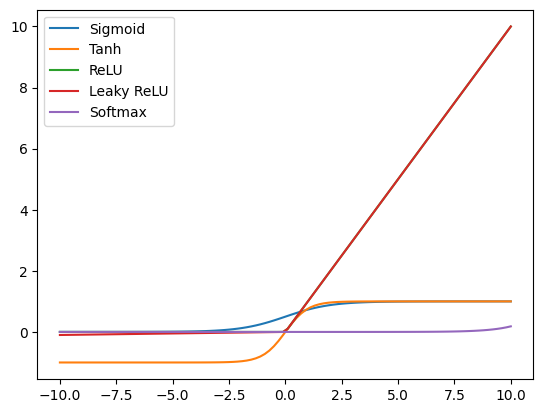

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-10, 10, 100)
plt.plot(x, 1 / (1 + np.exp(-x)), label='Sigmoid')
plt.plot(x, np.tanh(x), label='Tanh')
plt.plot(x, np.maximum(0, x), label='ReLU')
plt.plot(x, np.where(x > 0, x, x * 0.01), label='Leaky ReLU')
plt.plot(x, np.exp(x) / np.sum(np.exp(x)), label='Softmax')
plt.legend()
plt.show()

## ***`3`***
Implement a python program for Perceptron Networks by considering the given scenario. A student wants to make a decision about whether to go for a movie or not
by looking at 3 parameters using a single neuron. The three inputs are Favorite hero, heroine, and Climate. Each has weights and we have a bias in the perceptron. If the
condition is true input is 1 else input is 0, weights for Favorite hero-0.2, heroine-0.4, and Climate-0.2 and bias=-0.5. Output is 1. The decision is to go for
a movie.Calculate the Accuracy.

In [ ]:
def perceptron(inputs, weights, bias):
    activation = sum(i * w for i, w in zip(inputs, weights)) + bias
    return 1 if activation >= 0 else 0

inputs = [1, 1, 1]
weights = [0.2, 0.4, 0.2]
bias = -0.5

expected_output = 1

output = perceptron(inputs, weights, bias)

accuracy = 100 if output == expected_output else 0

print("Output:", output)
print("Accuracy:", accuracy, "%")


Output: 1
Accuracy: 100 %


### ***`4`***
Write a program in deep learning to apply image processing operations such as
Histogram equalization, Thresholding, Edge detection, Data
augmentation, Morphological Operations.

In [ ]:
import cv2
import numpy as np

def process_image(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    equalized = cv2.equalizeHist(img)
    _, thresholded = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY)
    edges = cv2.Canny(img, 100, 200)
    flipped = cv2.flip(img, 1)
    kernel = np.ones((5, 5), np.uint8)
    morphed = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)

    cv2.imshow('Original', img)
    cv2.imshow('Equalized', equalized)
    cv2.imshow('Thresholded', thresholded)
    cv2.imshow('Edges', edges)
    cv2.imshow('Flipped', flipped)
    cv2.imshow('Morphed', morphed)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

process_image('/home/lab705/Downloads/1.jpeg')


error: OpenCV(4.11.0) /io/opencv/modules/imgproc/src/morph.dispatch.cpp:1163: error: (-215:Assertion failed) !_src.empty() in function 'morphologyEx'


### ***`5`***
Implement image style transfer, transforming a given content image to adopt the
artistic style of another image, using a pre-trained model.


In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt

def load_and_process_image(image_path):
    img = tf.image.resize(tf.image.decode_image(tf.io.read_file(image_path), channels=3), [512, 512])
    return img[tf.newaxis, ...] / 255.0

model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

content_image = load_and_process_image('/home/lab705/Downloads/1.jpeg')
style_image = load_and_process_image('/home/lab705/Downloads/2.jpeg')

stylized_image = model(content_image, style_image)[0]

plt.figure(figsize=(12, 4))
for i, img in enumerate([content_image, style_image, stylized_image], 1):
    plt.subplot(1, 3, i)
    plt.imshow(img[0])
    plt.axis('off')
plt.show()


NotFoundError: {{function_node __wrapped__ReadFile_device_/job:localhost/replica:0/task:0/device:CPU:0}} /home/lab705/Downloads/1.jpeg; No such file or directory [Op:ReadFile]

### ***`6`***
Implement in python SVM/Softmax classifier for CIFAR-10 dataset.

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

model = tf.keras.models.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)),
    layers.Dense(512, activation='relu'),
    layers.Dense(10)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

predictions = model.predict(x_test)


predicted_labels = np.argmax(predictions, axis=1)

num_samples_to_display = 5
for i in range(num_samples_to_display):
    print(f"Sample {i+1}: True Label: {y_test[i][0]}, Predicted Label: {predicted_labels[i]}")


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.2844 - loss: 2.0768 - val_accuracy: 0.3767 - val_loss: 1.7607
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.3855 - loss: 1.7209 - val_accuracy: 0.4061 - val_loss: 1.6767
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.4137 - loss: 1.6429 - val_accuracy: 0.4292 - val_loss: 1.5882
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.4330 - loss: 1.5862 - val_accuracy: 0.4236 - val_loss: 1.6192
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 11ms/step - accuracy: 0.4406 - loss: 1.5638 - val_accuracy: 0.4477 - val_loss: 1.5734
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.4560 - loss: 1.5333 - val_accuracy: 0.4554 - val_loss: 1.5344
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.4637 - loss: 1.5086 - val_accuracy: 0.4434 - val_loss: 1.5729
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.4618 -

### ***`7`***
Develop a convolutional neural network (CNN) model to classify handwritten digits using the MNIST dataset. The goal is to train a model that accurately identifies
digits (0-9) from images.

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1)) / 255.0
test_images = test_images.reshape((10000, 28, 28, 1)) / 255.0

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 16ms/step - accuracy: 0.8888 - loss: 0.3460 - val_accuracy: 0.9867 - val_loss: 0.0422
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 43s 17ms/step - accuracy: 0.9840 - loss: 0.0504 - val_accuracy: 0.9880 - val_loss: 0.0330
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 16ms/step - accuracy: 0.9883 - loss: 0.0366 - val_accuracy: 0.9904 - val_loss: 0.0312
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - accuracy: 0.9916 - loss: 0.0270 - val_accuracy: 0.9905 - val_loss: 0.0307
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - accuracy: 0.9939 - loss: 0.0200 - val_accuracy: 0.9917 - val_loss: 0.0286
313/313 - 2s - 5ms/step - accuracy: 0.9917 - loss: 0.0286

Test accuracy: 0.9916999936103821


### ***`8`***
Design and implement a deep learning model to classify underwater sonar signals into two categories (Rocks 'R' or Mines 'M) using the sonar dataset.csv. Evaluate
the performance of the model on unseen test data and demonstrate the impact of
incorporating dropout layers to improve generalization.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import tensorflow as tf

# Load and prepare data
data = pd.read_csv('/home/lab705/DL/sonar.csv')
X = StandardScaler().fit_transform(data.drop('Target', axis=1))
y = LabelEncoder().fit_transform(data['Target'])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build and compile model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(60, activation='relu', input_dim=60),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train and evaluate model
model.fit(X_train, y_train, epochs=50, validation_split=0.1)
print("Test Accuracy:", model.evaluate(X_test, y_test)[1])


FileNotFoundError: [Errno 2] No such file or directory: '/home/lab705/DL/sonar.csv'

### ***`9`***
Implementing a Deep Convolutional Generative Adversarial Network (DCGAN) to
Simulate Realistic Images

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, Sequential
import matplotlib.pyplot as plt
import numpy as np

def make_generator():
    return Sequential([
        layers.Dense(7*7*256, use_bias=False, input_shape=(100,)),
        layers.BatchNormalization(),
        layers.LeakyReLU(),
        layers.Reshape((7, 7, 256)),
        layers.Conv2DTranspose(128, 5, strides=1, padding='same', use_bias=False),
        layers.BatchNormalization(),
        layers.LeakyReLU(),
        layers.Conv2DTranspose(64, 5, strides=2, padding='same', use_bias=False),
        layers.BatchNormalization(),
        layers.LeakyReLU(),
        layers.Conv2DTranspose(1, 5, strides=2, padding='same', use_bias=False, activation='tanh')
    ])

def make_discriminator():
    return Sequential([
        layers.Conv2D(64, 5, strides=2, padding='same', input_shape=(28, 28, 1)),
        layers.LeakyReLU(),
        layers.Dropout(0.3),
        layers.Conv2D(128, 5, strides=2, padding='same'),
        layers.LeakyReLU(),
        layers.Dropout(0.3),
        layers.Flatten(),
        layers.Dense(1)
    ])

generator = make_generator()
discriminator = make_discriminator()

cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)
gen_opt = tf.keras.optimizers.Adam(1e-4)
disc_opt = tf.keras.optimizers.Adam(1e-4)

@tf.function
def train_step(images, batch_size=32):
    noise = tf.random.normal([batch_size, 100])
    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        generated_images = generator(noise, training=True)
        real_output = discriminator(images, training=True)
        fake_output = discriminator(generated_images, training=True)
        gen_loss = cross_entropy(tf.ones_like(fake_output), fake_output)
        disc_loss = cross_entropy(tf.ones_like(real_output), real_output) + cross_entropy(tf.zeros_like(fake_output), fake_output)
    generator_gradients = gen_tape.gradient(gen_loss, generator.trainable_variables)
    discriminator_gradients = disc_tape.gradient(disc_loss, discriminator.trainable_variables)
    gen_opt.apply_gradients(zip(generator_gradients, generator.trainable_variables))
    disc_opt.apply_gradients(zip(discriminator_gradients, discriminator.trainable_variables))

# Load and preprocess the MNIST dataset
(train_images, _), (_, _) = tf.keras.datasets.mnist.load_data()
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1).astype('float32')
train_images = (train_images - 127.5) / 127.5  # Normalize to [-1, 1]

batch_size = 256
train_dataset = tf.data.Dataset.from_tensor_slices(train_images).shuffle(60000).batch(batch_size)

# Training loop
epochs = 50
num_examples_to_generate = 16
seed = tf.random.normal([num_examples_to_generate, 100])

def generate_and_save_images(model, epoch, test_input):
    predictions = model(test_input, training=False)
    fig = plt.figure(figsize=(4, 4))

    for i in range(predictions.shape[0]):
        plt.subplot(4, 4, i+1)
        plt.imshow((predictions[i, :, :, 0] + 1) / 2, cmap='gray')
        plt.axis('off')

    plt.savefig('image_at_epoch_{:04d}.png'.format(epoch))
    plt.show()

for epoch in range(epochs):
    for image_batch in train_dataset:
        train_step(image_batch)

    generate_and_save_images(generator, epoch + 1, seed)

generate_and_save_images(generator, epochs, seed)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


KeyboardInterrupt: 

### ***`10`***
Study the effect of batch normalization and dropout in neural network classifiers.

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Flatten
from tensorflow.keras.models import Sequential


(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

def train_model(use_batch_norm=False):
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation='relu' if not use_batch_norm else None),
        (BatchNormalization() if use_batch_norm else Dropout(0.2)),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    model.fit(x_train, y_train, epochs=5, verbose=0)
    return model.evaluate(x_test, y_test, verbose=0)

print("Dropout Model Accuracy:", train_model(use_batch_norm=False)[1])
print("Batch Norm Model Accuracy:", train_model(use_batch_norm=True)[1])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Dropout Model Accuracy: 0.9761000275611877
Batch Norm Model Accuracy: 0.9199000000953674


### ***`11`***
To implement an object detection and segmentation model using Mask R-CNN on
a given image.

In [ ]:
!pip install tf-models-official
!pip install tensorflow


In [ ]:
!pip install tensorflow
!pip install opencv-python
!pip install numpy==1.19.5  # Install a specific version (replace 1.19.5 with a compatible version)

In [ ]:
# Clone the Mask R-CNN repository if not already present
!git clone https://github.com/akTwelve/Mask_RCNN.git

import os
import sys
import skimage.io
import matplotlib.pyplot as plt
import tensorflow as tf

# Set up paths and configurations
ROOT_DIR = "Mask_RCNN"
MODEL_DIR = os.path.join(ROOT_DIR, "logs")
IMAGE_PATH = "/content/abcd.png"
COCO_MODEL_PATH = os.path.join(ROOT_DIR, "mask_rcnn_coco.h5")

# Import Mask R-CNN and COCO configuration
sys.path.append(ROOT_DIR)
from mrcnn import utils, model as modellib, visualize
sys.path.append(os.path.join(ROOT_DIR, "samples/coco/"))
import coco

# Download COCO weights if not already present
if not os.path.exists(COCO_MODEL_PATH):
    utils.download_trained_weights(COCO_MODEL_PATH)

# Inference configuration for CPU
class InferenceConfig(coco.CocoConfig):
    GPU_COUNT = 0
    IMAGES_PER_GPU = 1

config = InferenceConfig()
model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR, config=config)
model.load_weights(COCO_MODEL_PATH, by_name=True)

# Load image
image = skimage.io.imread(IMAGE_PATH)

# Perform detection
results = model.detect([image], verbose=0)
r = results[0]

# Class names for COCO dataset
class_names = ['BG', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
               'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign',
               'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep',
               'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella',
               'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard',
               'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard',
               'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork',
               'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange',
               'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair',
               'couch', 'potted plant', 'bed', 'dining table', 'toilet', 'tv',
               'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave',
               'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase',
               'scissors', 'teddy bear', 'hair drier', 'toothbrush']

# Visualize results
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], class_names, r['scores'])

### ***`12`***
To design and implement a customer support chatbot that leverages
Bidirectional LSTMs to enhance its ability to understand and respond to user
queries accurately and contextually.

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load a small sample text corpus (replace with your own)
corpus = [
    "Hello, how are you?",
    "I am doing well.",
    "What's your name?",
    "My name is ChatBot.",
    "How can I help you?",
    "Tell me a joke.",
    "Why did the chicken cross the road?",
    "To get to the other side."
]

# Tokenization and Vocabulary Creation
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
vocab_size = len(tokenizer.word_index) + 1  # Add 1 for padding token
word_index = tokenizer.word_index

# Set model parameters
embedding_dim = 128
lstm_units = 64
max_length = 10  # Adjust based on your corpus

# Prepare training data
sequences = tokenizer.texts_to_sequences(corpus)
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='pre')

# Split data into input and target sequences
input_sequences = padded_sequences[:, :-1]
target_sequences = padded_sequences[:, 1:]

# Model Definition
model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length-1),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm_units, return_sequences=True)),
    tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(vocab_size, activation='softmax'))
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Reshape target data to match output shape of the model
target_sequences = target_sequences.reshape((target_sequences.shape[0], target_sequences.shape[1], 1))

# Train the model (adjust epochs based on your data)
model.fit(input_sequences, target_sequences, epochs=200)

def generate_response(input_query, max_length=10):
    input_sequence = tokenizer.texts_to_sequences([input_query])[0]
    input_sequence = pad_sequences([input_sequence], maxlen=max_length-1, padding='pre')

    predicted_sequence = model.predict(input_sequence)
    predicted_words = [np.argmax(predicted_sequence[0][i]) for i in range(predicted_sequence.shape[1])]
    response = tokenizer.sequences_to_texts([predicted_words])[0]
    return response

# Example interaction
user_query = "Hello, how are you?"
response = generate_response(user_query)
print(f"User: {user_query}")
print(f"ChatBot: {response}")


### ***`13`***
To implement the YOLO model for detecting objects in images from the
COCO dataset.

In [ ]:
import tensorflow as tf
import cv2
import numpy as np

model = tf.keras.models.load_model('yolo.h5')
classes = ["person", "bicycle", "car", "..."]

image = cv2.imread('coco_image.jpg')
input_image = cv2.resize(image, (416, 416))
input_image = input_image / 255.0
input_image = np.expand_dims(input_image, 0)

detections = model.predict(input_image)

boxes = detections[:, :, :4]
scores = detections[:, :, 4]
class_ids = np.argmax(detections[:, :, 5:], axis=-1)


for i in range(len(boxes)):
    if scores[i] > 0.5:  # Confidence threshold
        x, y, w, h = boxes[i]
        x, y, w, h = int(x), int(y), int(w), int(h)
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
        label = classes[class_ids[i]]
        cv2.putText(image, label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

cv2.imshow("Detections", image)
cv2.waitKey(0)

### ***`14`***
To develop a GRU-based RNN model for sentiment analysis on the IMDB movie
reviews dataset

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

# Load IMDB dataset (using top 5000 most frequent words)
vocab_size = 5000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)

# Pad sequences to have the same length
max_len = 500
x_train = sequence.pad_sequences(x_train, maxlen=max_len)
x_test = sequence.pad_sequences(x_test, maxlen=max_len)

# Build GRU model
model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(vocab_size, 128),
    tf.keras.layers.GRU(128),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5, batch_size=64)

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print("Accuracy:", accuracy)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/5
352/391 ━━━━━━━━━━━━━━━━━━━━ 46s 1s/step - accuracy: 0.6741 - loss: 0.5786

KeyboardInterrupt: 

### ***`15`***
To implement an automated text summarization system using the T5
transformer model.

In [ ]:

import torch
from transformers import T5ForConditionalGeneration, T5Tokenizer

model_name = "t5-small"
tokenizer = T5Tokenizer.from_pretrained(model_name)
model = T5ForConditionalGeneration.from_pretrained(model_name)

def summarize_text(text, max_length=50):
    input_text = "summarize: " + text
    input_ids = tokenizer.encode(input_text, return_tensors="pt", add_special_tokens=True)
    output_ids = model.generate(input_ids=input_ids, max_length=max_length, num_beams=4, no_repeat_ngram_size=2)
    summary = tokenizer.decode(output_ids[0], skip_special_tokens=True)
    return summary

text = """
Without strong security rules, anyone who has the address of your database can read / write to it, leaving your data vulnerable to attackers stealing, modifying, or deleting data as well as creating costly operations.
"""

summary = summarize_text(text)
print(summary)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/2.32k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/242M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

anyone who has the address of your database can read / write to it, leaving your data vulnerable to attackers stealing, modifying, or deleting data.
